In [42]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
#plt.rcParams['figure.figsize'] = (15, 10)

In [43]:
#Leemos el CSV
nlp = pd.read_csv('data/train.csv')

In [44]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [45]:
#calculo la longitud de los tweets
nlp['length_tweet'] = nlp['text'].str.len()
nlp.head()

,id,keyword,location,text,target,length_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [46]:
#hago describe del DF
nlp.describe()

,id,target,length_tweet
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.161697
std,3137.116090,0.49506,33.854073
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


In [47]:
#veo cuantos nulos hay por columnas
nlp.isnull().sum()

id                 0
keyword           61
location        2533
text               0
target             0
length_tweet       0
dtype: int64

In [48]:
#hay solo nulos en keyword y location no se van a usar para este analisis, no hago tratamiento de nulos

In [70]:
#agrupo por target y por longitud de tweet
#me quedo con target y length_tweet
#cuento la cantidad de tweets con cada longitud (en id que posteriormente le cambio la denominacion)
#cant_veces es la cantidad de veces que hay longitud de tweets dependiendo el target

grouped = nlp.groupby(['length_tweet','target'])[['id']].count().reset_index()
grouped.rename(columns={'id':'cant_veces'}, inplace=True)
grouped.tail(10)

,length_tweet,target,cant_veces
271,147,1,3
272,148,0,4
273,148,1,3
274,149,0,2
275,149,1,1
276,150,1,2
277,151,1,1
278,152,0,1
279,155,0,1
280,157,0,1


In [50]:
#agrupo los tweets reales (target==1) y los transpongo para obtener un DF cuyas columnas son las filas del describe.
real_tweets = grouped.loc[grouped['target']==1, :]
real_tweets_transp = real_tweets.describe()[['length_tweet']].rename(columns={'length_tweet':'real_tweets'}).transpose()
real_tweets_transp

,count,mean,std,min,25%,50%,75%,max
real_tweets,135.0,83.933333,39.227465,14.0,50.5,84.0,117.5,151.0


In [51]:
#agrupo los tweets falsos (target==0) y los transpongo para obtener un DF con las columnas del describe.
unreal_tweets = grouped.loc[grouped['target']==0, :]
unreal_tweets_transp = unreal_tweets.describe()[['length_tweet']].rename(columns={'length_tweet':'unreal_tweets'}).transpose()
unreal_tweets_transp

,count,mean,std,min,25%,50%,75%,max
unreal_tweets,146.0,79.575342,42.422804,7.0,43.25,79.5,115.75,157.0


In [66]:
#junto los dos DF en uno solo para comparar los parametros del describe
#dropeo las columnas 25%, 50%, 75% que no me aportan informacion
all_tweets = pd.concat([real_tweets_transp, unreal_tweets_transp]).drop(columns = ["25%", "50%", "75%"])
all_tweets

,count,mean,std,min,max
real_tweets,135.0,83.933333,39.227465,14.0,151.0
unreal_tweets,146.0,79.575342,42.422804,7.0,157.0


Text(0, 0.5, 'Veces que se repite cada cantidad')

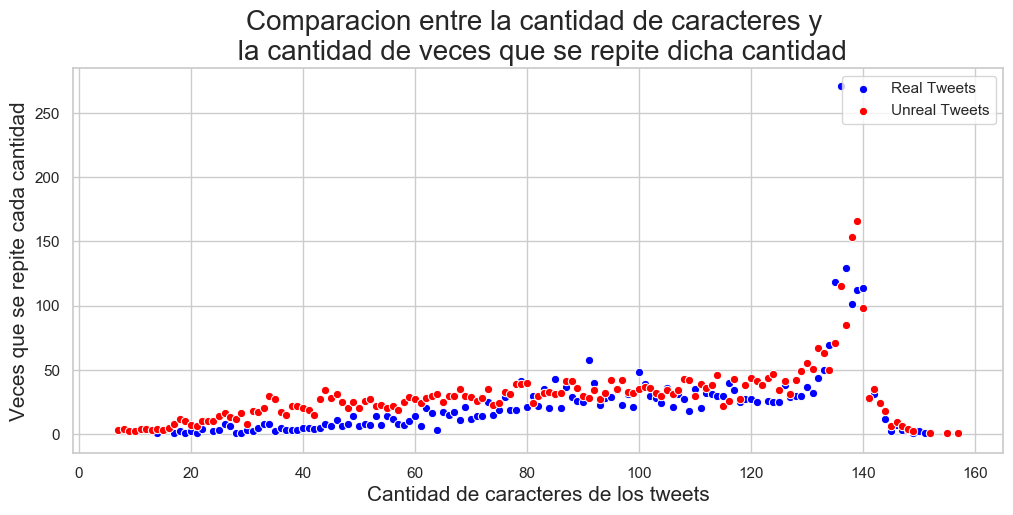

In [75]:
#grafico los realTweets y los unrealTweets para compararlos en un scatterplot

# Tamanio
plt.figure(figsize=(12, 5))

sns.scatterplot(x="length_tweet", y="cant_veces", color="blue", data=realTweets, label = "Real Tweets")
sns.scatterplot(x="length_tweet", y="cant_veces", color="red", data=unrealTweets, label = "Unreal Tweets")
plt.title("Comparacion entre la cantidad de caracteres y \n la cantidad de veces que se repite dicha cantidad", fontsize=20)
plt.xlabel("Cantidad de caracteres de los tweets", fontsize=15)
plt.ylabel("Veces que se repite cada cantidad", fontsize=15)